In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.axes_style("darkgrid");

In [2]:
df = pd.read_csv("metrics/metrics_02_05_2021_20_00_22.csv")
df.head()

,file,pesq,stoi
0,m7_script5_ipad_confroom1_denoised.wav,2.307213,0.828735
1,f7_script5_iphone_livingroom1_denoised.wav,1.893603,0.661960
2,f2_script5_ipad_confroom2_denoised.wav,2.571508,0.936778
3,m1_script5_ipad_bedroom1_denoised.wav,2.194737,0.760412
4,f1_script5_iphone_bedroom1_denoised.wav,2.222832,0.789765


In [ ]:
# Benchmarks on DAPS dataset (from HiFi-GAN paper)
WPE+Wiener  1.84 0.87 
Deep FL  1.63 0.85 
Wave-U-Net  1.47 0.86 
BLSTM  1.63 0.88 
MetricGAN  1.89 0.88
 
Base 1.76 0.89 
+Postnet 1.93 0.89 
+Postnet +SpecGAN 1.97 0.87 
+Postnet +WaveGAN 1.86 0.88 
HiFi-GAN (All) 2.00 0.89 

In [4]:
# overall stats
df.describe()

,pesq,stoi
count,240.000000,240.000000
mean,2.042631,0.727752
std,0.443928,0.149062
min,0.495427,0.305208
25%,1.886044,0.691918
50%,2.155381,0.762510
75%,2.330443,0.834804
max,2.914181,0.952881


In [5]:
# Best and worst performing clips
for column, values in df.items():
    if column == 'pesq' or column == 'stoi':
        print(f"{column} max at {df.iloc[df[column].idxmax()]}\n")
        print(f"{column} min at {df.iloc[df[column].idxmin()]}\n")

pesq max at file    f5_script5_ipad_confroom2_denoised.wav
pesq                                   2.91418
stoi                                  0.952881
Name: 221, dtype: object

pesq min at file    m10_script5_iphone_balcony1_denoised.wav
pesq                                    0.495427
stoi                                    0.360011
Name: 34, dtype: object

stoi max at file    f5_script5_ipad_confroom2_denoised.wav
pesq                                   2.91418
stoi                                  0.952881
Name: 221, dtype: object

stoi min at file    m1_script5_iphone_balcony1_denoised.wav
pesq                                    1.09217
stoi                                   0.305208
Name: 141, dtype: object



In [9]:
# stats for each environment
envs = ["balcony", "livingroom", "confroom", "bedroom", "office"]

for env in envs:
    df.loc[df['file'].str.contains(env), 'environment'] = env

env_stats =df.groupby('environment').agg({'pesq': ['mean'],
'stoi': ['mean']})

# env_stats.style.highlight_max(color = 'red', axis = 0)
cm = sns.light_palette("red", as_cmap=True)

env_stats.style.background_gradient(cmap='rocket')

,pesq,stoi
,mean,mean
environment,,
balcony,1.242862,0.444086
bedroom,2.140806,0.741056
confroom,2.315713,0.811454
livingroom,2.063681,0.746709
office,2.223246,0.811655


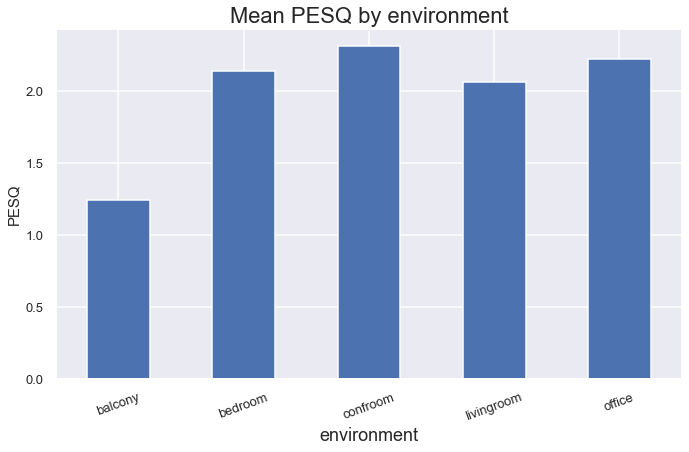

In [37]:
env_pesq = df.groupby(['environment'])['pesq'].mean()

env_pesq.plot(kind='bar', figsize=(10,6), fontsize=13)
plt.xticks(rotation=20, horizontalalignment="center")
plt.title("Mean PESQ by environment", fontsize=22)
plt.ylabel("PESQ", fontsize=15);
plt.show()

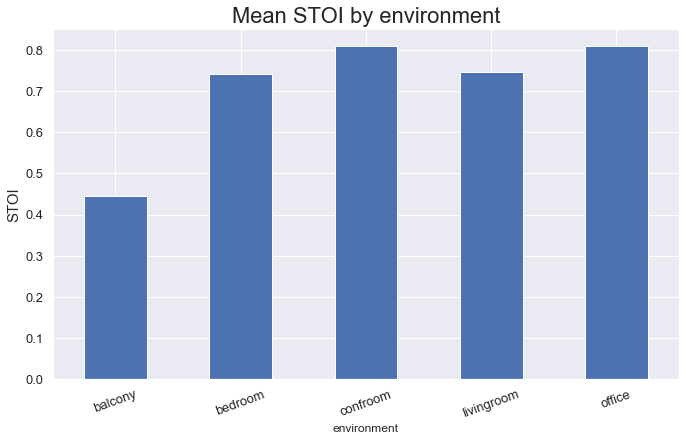

In [25]:
env_stoi = df.groupby(['environment'])['stoi'].mean()

env_stoi.plot(kind='bar', figsize=(10,6), fontsize=13)
plt.xticks(rotation=20, horizontalalignment="center")
plt.title("Mean STOI by environment", fontsize=22)
plt.ylabel("STOI", fontsize=15);
plt.show()

In [10]:
# stats for each device
devices = ["iphone", "ipad"]

for device in devices:
    df.loc[df['file'].str.contains(device), 'device'] = device

device_stats = df.groupby('device').agg({'pesq': ['mean'],
'stoi': ['mean']})


device_stats.style.background_gradient(cmap='rocket')

,pesq,stoi
,mean,mean
device,,
ipad,2.125749,0.770090
iphone,1.793279,0.600740


In [11]:
# stats for each sex
sexes = ["f", "m"]

for sex in sexes:
    df.loc[df['file'].str.contains(sex), 'sex'] = sex


sex_stats = df.groupby('sex').agg({'pesq': ['mean'],
'stoi': ['mean']})


sex_stats.style.background_gradient(cmap='rocket')

,pesq,stoi
,mean,mean
sex,,
f,1.885761,0.674627
m,2.083913,0.741733


In [12]:
# stats for each speaker
numbers = list(range(1,11))

speakers = []
for sex in sexes:
    for number in numbers:
        speakers.append(sex + str(number))


for speaker in speakers:
    df.loc[df['file'].str.contains(speaker), 'speaker'] = speaker


speaker_stats = df.groupby('speaker').agg({'pesq': ['mean'],
'stoi': ['mean']})


speaker_stats.style.background_gradient(cmap='rocket')

,pesq,stoi
,mean,mean
speaker,,
f1,1.872541,0.676646
f10,1.863829,0.688878
f2,1.782261,0.636730
f3,1.879774,0.693141
f4,1.902630,0.735569
f5,1.991998,0.712225
f6,1.781586,0.620854
f7,2.021642,0.627649


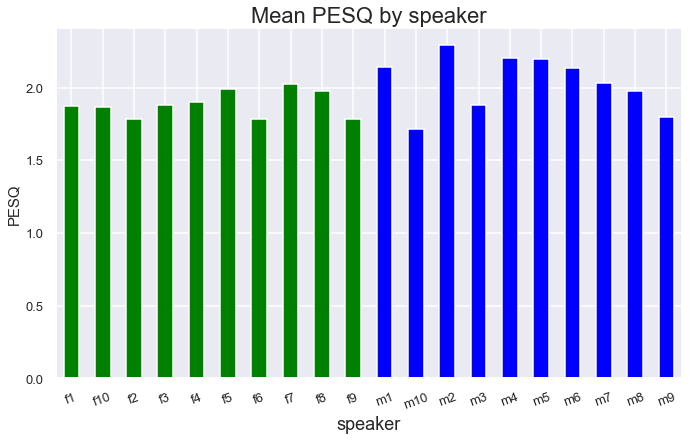

In [51]:
speaker_pesq = df.groupby(['speaker'])['pesq'].mean()

colors = []
for i in range(20):
    if i < 10:
        colors.append("green")
    else:
        colors.append("blue")

speaker_pesq.plot(kind='bar', figsize=(10,6), fontsize=13, color = colors)
plt.xticks(rotation=20, horizontalalignment="center")
plt.title("Mean PESQ by speaker", fontsize=22)
plt.ylabel("PESQ", fontsize=15);
plt.show()

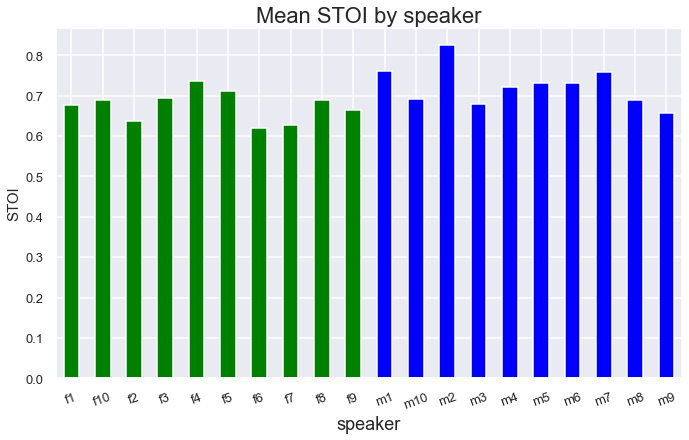

In [52]:
speaker_stoi = df.groupby(['speaker'])['stoi'].mean()

speaker_stoi.plot(kind='bar', figsize=(10,6), fontsize=13, color = colors)
plt.xticks(rotation=20, horizontalalignment="center")
plt.title("Mean STOI by speaker", fontsize=22)
plt.ylabel("STOI", fontsize=15);
plt.show()